In [1]:
%matplotlib inline 

import numpy as np
import os
from matplotlib import pyplot as plt

#loading the images
import skimage.io as io



In [10]:
import random
from skimage.transform import resize

fns = os.listdir('MNIST/3')

imgs = []

for i in [3, 8]:
    for fn in os.listdir('MNIST/' + str(i)):
        img = io.imread('MNIST/%d/%s' % (i, fn), dtype=np.float64)
        img = resize(img, (29, 29))
        img = img / 255
        imgs.append((img, i))

random.shuffle(imgs)

inputs = np.zeros((len(imgs), 29, 29))
outputs = np.zeros((len(imgs)))

for i, (img, value) in enumerate(imgs):
    inputs[i] = img
    outputs[i] = 1 if value == 8 else 0
    
inputs = inputs.reshape(len(inputs), 29, 29, 1)


/home/rafael/Apps/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [11]:
print(inputs.shape)

(8414, 29, 29, 1)


In [19]:
import math
import scipy.ndimage.filters
from scipy.special import expit

def convolve(mat, filter): 
    res = scipy.ndimage.filters.convolve(mat, filter)
    (dline, dcol) = (filter.shape[0] - 1) // 2, (filter.shape[1] - 1) // 2
    return res[dline : -dline, dcol : -dcol]
        
sigmoid = expit

In [56]:
def grad_filter2(factor, mat_inter):
    return mat_inter * factor

def grad_filter1(mat, ginter): 
    a = np.zeros(ginter.shape)
    
    dline, dcol = (a.shape[0] - 1) / 2, (a.shape[1] - 1) / 2
    
    for f_i in np.ndindex(a.shape): 
        for inter_i in np.ndindex(a.shape):
            a[f_i] += ginter[inter_i] * mat[inter_i[0] + f_i[0], inter_i[1] + f_i[1]]
            
    return a
        
def grad_mat_inter(factor, filter2):
    return filter2 * factor

def normalize(mat):
    return mat / 255.0

def train_step(mat, filter1, filter2, coeff, correct, lr): 
    mat_inter = convolve(mat, filter1)
    v = convolve(mat_inter, filter2)[0,0]
    result_before_sig = coeff[0] * v + coeff[1]
    result = sigmoid(result_before_sig)
    
    print('result_before_sig: ', result_before_sig, 'result:', result, 'correct:', correct, 'coeff:', coeff)
    
    factor = (result - correct) * result * (1 - result)
    new_factor = factor * coeff[0]
    
    print('delta coeff:', factor * v * lr)
    coeff[0] -= factor * v * lr
    coeff[1] -= factor * lr
    
    factor = new_factor
    
#     print('factor: ', factor )
    
    gf2 = grad_filter2(factor, mat_inter)
    ginter = grad_mat_inter(factor, mat_inter)
    gf1 = grad_filter1(mat, ginter)
    
    for i in np.ndindex(filter1.shape): 
        filter1[i] -= lr * gf1[i]
        filter2[i] -= lr * gf2[i]
    
    return 1 if result > 0.5 else 0

In [54]:
from IPython.display import clear_output

id = 3

factor = 0.1
lr = 0.1
filter1 = (np.random.rand(15,15) - 0.5) * factor
filter2 = (np.random.rand(15,15) - 0.5) * factor

coeff = (np.random.rand(2) - 0.5) * factor

# print(inputs[id].shape)

for a in range(100):
    train_step(inputs[id].reshape(29,29), filter1, filter2, coeff, outputs[id], lr)
    

#we are identifying if we obtain an 8
# for a in range(10):
#     right = 0
    
#     for i, input in enumerate(inputs[:100]):
#         res = train_step(input.reshape(29,29), filter1, filter2, coeff, outputs[i], 0.001)
#         if res == outputs[i]: right += 1
#         #clear_output(wait=True)
#         #print('iter', i, '->', right / (i+1) * 100)



result_before_sig:  0.03418495879256026 result: 0.5085454075259549 correct: 0.0 coeff: [-0.03405301  0.03052187]
delta coeff: -0.002781966776723938
result_before_sig:  0.008811498363376174 result: 0.5022028603378965 correct: 0.0 coeff: [-0.03127104  0.00466002]
delta coeff: -0.0033482550295858104
result_before_sig:  -0.01579608103245819 result: 0.49605106185187275 correct: 0.0 coeff: [-0.02792278 -0.02056075]
delta coeff: -0.00419881400183308
result_before_sig:  -0.03994420934644213 result: 0.4900152752136197 correct: 0.0 coeff: [-0.02372397 -0.04516741]
delta coeff: -0.00528650820102974
result_before_sig:  -0.06431816196612372 result: 0.4839260004046838 correct: 0.0 coeff: [-0.01843746 -0.06917891]
delta coeff: -0.006173905422137879
result_before_sig:  -0.08932227351746602 result: 0.4776842667626941 correct: 0.0 coeff: [-0.01226356 -0.09259735]
delta coeff: -0.0060937785323095656
result_before_sig:  -0.1140874262591454 result: 0.4715090397877788 correct: 0.0 coeff: [-0.00616978 -0.115

result_before_sig:  -0.8226600340580056 result: 0.3051993004162414 correct: 0.0 coeff: [-0.07547653 -0.82812974]
delta coeff: -0.000675024406817231
result_before_sig:  -0.8314606706021771 result: 0.3033363076692549 correct: 0.0 coeff: [-0.07480151 -0.83744441]
delta coeff: -0.0007360559296808299
result_before_sig:  -0.8400145327387574 result: 0.301531723243537 correct: 0.0 coeff: [-0.07406545 -0.8466457 ]
delta coeff: -0.0008140295321132987
result_before_sig:  -0.848313104687107 result: 0.2997868419968187 correct: 0.0 coeff: [-0.07325142 -0.85573784]
delta coeff: -0.0009109400280275734
result_before_sig:  -0.8563487829486471 result: 0.2981027535799071 correct: 0.0 coeff: [-0.07234048 -0.86472505]
delta coeff: -0.0010289662274077383
result_before_sig:  -0.864116852791706 result: 0.29647993536196404 correct: 0.0 coeff: [-0.07131152 -0.87361158]
delta coeff: -0.0011703432179697472
result_before_sig:  -0.871618192538742 result: 0.2949177013896538 correct: 0.0 coeff: [-0.07014117 -0.8824016

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 15, 15, 1)         226       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 1, 1)           226       
_________________________________________________________________
flatten_6 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 454
Trainable params: 454
Non-trainable params: 0
_________________________________________________________________
None


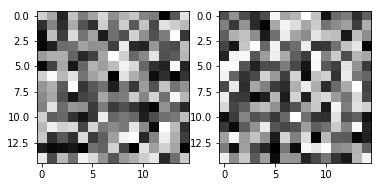

[array([[-0.28091466]], dtype=float32), array([0.], dtype=float32)]
Train on 8414 samples, validate on 842 samples
Epoch 1/10
8414/8414 [==============================] - 1s 104us/step - loss: 0.4035 - acc: 0.8585 - val_loss: 0.2064 - val_acc: 0.9252
Epoch 2/10
8414/8414 [==============================] - 1s 87us/step - loss: 0.1800 - acc: 0.9317 - val_loss: 0.1739 - val_acc: 0.9323
Epoch 3/10
8414/8414 [==============================] - 1s 98us/step - loss: 0.1577 - acc: 0.9421 - val_loss: 0.1630 - val_acc: 0.9359
Epoch 4/10
8414/8414 [==============================] - 1s 95us/step - loss: 0.1454 - acc: 0.9489 - val_loss: 0.1446 - val_acc: 0.9454
Epoch 5/10
8414/8414 [==============================] - 1s 100us/step - loss: 0.1382 - acc: 0.9517 - val_loss: 0.1431 - val_acc: 0.9466
Epoch 6/10
8414/8414 [==============================] - 1s 88us/step - loss: 0.1326 - acc: 0.9557 - val_loss: 0.1316 - val_acc: 0.9501
Epoch 7/10
8414/8414 [==============================] - 1s 89us/step - lo

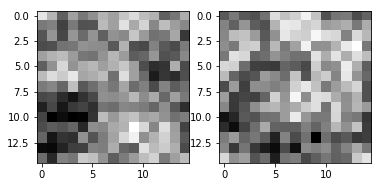

[array([[-1.0400909]], dtype=float32), array([-0.08063561], dtype=float32)]


In [9]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten

model = Sequential()

firstFilter = Conv2D(1, kernel_size=(15, 15), input_shape=(29, 29, 1))

model.add(firstFilter)

secondFilter = Conv2D(1, (15, 15))
model.add(secondFilter)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])

train_size = int(len(inputs) * 0.9)
train_in = inputs[:train_size]
train_out = outputs[:train_size]
test_in = inputs[train_size:]
test_out = outputs[train_size:]

draw_filters(model)

model.fit(inputs, outputs,
          epochs=10,
          verbose=1, 
          validation_data=(test_in, test_out))

draw_filters(model)

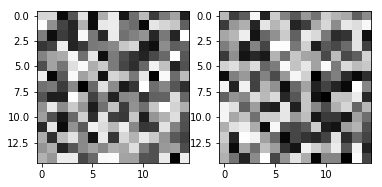

[array([[0.13625515]], dtype=float32), array([0.], dtype=float32)]


In [4]:
def draw_filters(model):    
    plt.subplot(121)
    weights = model.layers[0].get_weights()[0]
    weights = weights.reshape(15,15)
    plt.imshow(weights, cmap="gray")
    
    plt.subplot(122)
    weights = model.layers[1].get_weights()[0]
    weights = weights.reshape(15,15)
    plt.imshow(weights, cmap="gray")
    
    plt.show()
    
    weights = model.layers[3].get_weights()
    print(weights)
    
draw_filters(model)


In [ ]:
import scipy.ndimage.filters

from scipy.special import expit

def relu(mat):
    mat[mat < 0] = 0

id = 16

img = inputs[id].reshape(29,29)
plt.imshow(img, cmap="gray")
plt.show()

res = model.predict(inputs[id:id+1], verbose=1)[0][0]
print("Predict:", res)

img = inputs[id:id+1].reshape(29,29)
print(img.shape)

filter1 = model.layers[0].get_weights()[0].reshape(15,15)
filter2 = model.layers[1].get_weights()[0].reshape(15,15)

res = scipy.ndimage.filters.convolve(img, filter1)[7:22, 7:22]
relu(res)
res = scipy.ndimage.filters.convolve(res, filter2)[7:8, 7:8]
relu(res)
res = res[0,0]
print("Before last layer:", res)

weights = model.layers[3].get_weights()
coeff = weights[0][0,0]
bias = weights[1][0]

res = coeff * res + bias
print("Before sigma:", res)
res = expit(res)
print("After sigma:", res)

In [ ]:
from keras.models import Model

id=25
imgKeras = inputs[id:id+1]
#imgKeras = np.ones((1,29,29,1))
#print(imgKeras.shape)
imgConv = imgKeras.reshape(29,29)

res = model.predict(imgKeras)
print(res[0][0])

plt.subplot(121)
plt.imshow(imgConv, cmap="gray")

intermediate_layer_model = Model(inputs=firstFilter.input, outputs=firstFilter.output)
intermediate_output = intermediate_layer_model.predict(imgKeras).reshape(15,15)

plt.subplot(122)
plt.imshow(intermediate_output, cmap="gray")
plt.show()

#print(model.layers[0].get_weights())
# filter1 = model.layers[0].get_weights()[0].reshape(15,15)
# res = scipy.ndimage.filters.convolve(imgConv, filter1)[7:22, 7:22]
# relu(res)
# print(res[0])